# Introduction to data cleaning with Jupyter and pandas
## Meli Lewis, data engineer at [Simple](http://simple.com/)
### [melidata.com](http://melidata.com)

In [55]:
import numpy as np
import pandas as pd

from IPython.display import display, Image, YouTubeVideo

%matplotlib inline

### The case for open source data tools

- [Reproducibility and Transparency](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)

- Cost -- compare capabilities between software you already use and open source [here](https://en.wikipedia.org/wiki/Comparison_of_statistical_packages)

- Allows a diversity of platforms on a given team

### The case for notebooks

- They're amenable to sketching, and they're amenable to reproducibility.

- You can retrace your own steps and also make a narrative for someone else to follow.

- Built-in documentation streamlines your workflow; magic methods anticipate it.

# Jupyter Notebook: some cool tips for beginners

## 1. [Tab completion](https://en.wikipedia.org/wiki/Command-line_completion)

pd.re
from math import 

## 2. built-in documentation
  * shift-tab brings up brief function documentation

In [2]:
?pd.read_csv

## 3. Markdown cells, which can display other markup languages

# [Markdown](https://daringfireball.net/projects/markdown/) and HTML
<img src='http://i.imgur.com/WypQf94.gif' align='left'></span>
<br>
<br>
<br>

# LaTeX
<span style="font-size: 24px"> $\bar{x} = \frac{\sum_{i=1}^{n}w_i\cdot x_i}{\sum_{i=1}^{n}w_i}$</span>


# Syntax highlighting for other languages
```R
x <- c(0:10, 50)
xm <- mean(x)
c(xm, mean(x, trim = 0.10))
```

The final cell type is "Raw NBConvert"

## 4. [magic methods](http://ipython.org/ipython-doc/dev/interactive/tutorial.html#magics-explained)

In [3]:
%quickref

In [4]:
%%python2

print "hello world"

hello world


In [5]:
%history

import numpy as np
import pandas as pd

from IPython.display import display, Image, YouTubeVideo

%matplotlib inline
?pd.read_csv
%quickref
%%python2

print "hello world"
%history


In [6]:
# list the available line magics
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

## 5. [multimedia](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html)

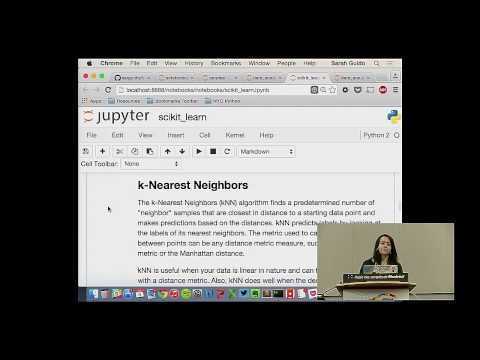

In [7]:
YouTubeVideo("L4Hbv4ugUWk")

## 6. Sharing! Notebooks are viewable on [NBViewer](https://nbviewer.jupyter.org/) and  [on github](https://github.com/meli-lewis/osb2015/blob/master/OSB2015_intro_data.ipynb), and also exportable as PDF or HTML.

## 7. Shell commands!

In [8]:
!ls

IRS_data          j                 pycaribbean.ipynb tourism_data


## 8. Keyboard shortcuts! Your implementation may vary.

Use [what's here](http://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/) or [roll your own](http://jupyter-notebook.readthedocs.org/en/latest/examples/Notebook/Custom%20Keyboard%20Shortcuts.html).

---

---

# Introduction to exploratory data analysis with Pandas

## First: United States income
Source: [IRS.gov](http://www.irs.gov/uac/SOI-Tax-Stats-Individual-Income-Tax-Statistics-ZIP-Code-Data-%28SOI%29)

### Input

In [9]:
pd.read_csv?

In [10]:
# read in a CSV
# specify that zipcode should be treated as a string rather than an int!
AGI = pd.read_csv('IRS_data/12zpallagi.csv',dtype={'zipcode': str})

In [11]:
AGI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166904 entries, 0 to 166903
Data columns (total 77 columns):
STATEFIPS    166904 non-null int64
STATE        166904 non-null object
zipcode      166904 non-null object
AGI_STUB     166904 non-null int64
N1           166904 non-null float64
MARS1        166904 non-null float64
MARS2        166904 non-null float64
MARS4        166904 non-null float64
PREP         166904 non-null float64
N2           166904 non-null float64
NUMDEP       166904 non-null float64
A00100       166904 non-null float64
N00200       166904 non-null float64
A00200       166904 non-null float64
N00300       166904 non-null float64
A00300       166904 non-null float64
N00600       166904 non-null float64
A00600       166904 non-null float64
N00650       166904 non-null float64
A00650       166904 non-null float64
N00900       166904 non-null float64
A00900       166904 non-null float64
SCHF         166904 non-null float64
N01000       166904 non-null float64
A01000 

### Transformation

In [12]:
# you can select columns by label or position!
AGI_column_subset = AGI[['STATE','AGI_STUB','zipcode','N1','A00100']]

In [13]:
# get information about type for a given field, and how many values you can expect for each
AGI_column_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166904 entries, 0 to 166903
Data columns (total 5 columns):
STATE       166904 non-null object
AGI_STUB    166904 non-null int64
zipcode     166904 non-null object
N1          166904 non-null float64
A00100      166904 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ MB


In [14]:
AGI_column_subset.describe()

,AGI_STUB,N1,A00100
count,166904.000000,166904.000000,1.669040e+05
mean,3.499940,1703.184106,1.093321e+05
std,1.707905,36669.348742,2.346716e+06
min,1.000000,0.000000,0.000000e+00
25%,2.000000,60.000000,3.869000e+03
50%,3.000000,220.000000,1.412900e+04
75%,5.000000,910.000000,5.508425e+04
max,6.000000,6404780.000000,4.601720e+08


In [15]:
# note this is inclusive!
AGI_column_subset.ix[6:11]

,STATE,AGI_STUB,zipcode,N1,A00100
6,AL,1,35004,1600,20639
7,AL,2,35004,1310,48501
8,AL,3,35004,900,55790
9,AL,4,35004,590,50978
10,AL,5,35004,480,59932
11,AL,6,35004,50,21723


In [16]:
AGI_column_subset = AGI_column_subset.rename(columns={'N1':'population','A00100':'amount'})
# AGI_column_subset.rename(columns={'N1':'population','A00100':'amount'},inplace=True)

In [17]:
# easy way to look at a subset of data without having to specify rows
AGI_column_subset.head()

,STATE,AGI_STUB,zipcode,population,amount
0,AL,1,00000,889920,11517112
1,AL,2,00000,491150,17617800
2,AL,3,00000,254280,15644666
3,AL,4,00000,160160,13885434
4,AL,5,00000,183320,24641055


In [18]:
# group by zipcode and sum other values, resetting index
AGI_grouped = AGI_column_subset.groupby('zipcode').sum().reset_index()

In [19]:
AGI_grouped.head()

,zipcode,AGI_STUB,population,amount
0,00000,1071,142098490,9123982917
1,01001,21,8780,458716
2,01002,21,9460,732849
3,01005,21,2230,122744
4,01007,21,7320,467891


## 00000?

<img src="http://i0.kym-cdn.com/photos/images/original/000/383/596/dec.gif" align="left">

In [20]:
AGI_grouped['population'].mean()

10254.987012987012

In [21]:
#this can also be done using the na_values parameter upon being read in
# null_zips = (AGI_grouped['zipcode'] == '00000')
null_zips = AGI_grouped['zipcode'].isin(['00000', '99999'])
AGI_grouped.loc[null_zips, 'zipcode'] = np.nan

In [22]:
AGI_grouped.head()

,zipcode,AGI_STUB,population,amount
0,NaN,1071,142098490,9123982917
1,01001,21,8780,458716
2,01002,21,9460,732849
3,01005,21,2230,122744
4,01007,21,7320,467891


<img src="http://45.media.tumblr.com/tumblr_m9hbpdSJIX1qhy6c9o1_400.gif" align="left">

In [23]:
AGI_notnull = AGI_grouped.dropna()

In [24]:
AGI_notnull['population'].mean()

5024.9671693484379

In [25]:
AGI_grouped.dropna(inplace=True)

In [26]:
# make a new column with the real amount, not in thousands
AGI_grouped['actual_amount'] = AGI_grouped['amount'] * 1000

Keep in mind you have options, and use magic methods to test implementation inline!

In [27]:
%timeit applied = AGI_grouped['amount'].apply(lambda x: x * 1000)

10 loops, best of 3: 15 ms per loop


In [28]:
#being vectorized operations, this is happening at the C level and thereby much faster
%timeit vectorized = AGI_grouped['amount'] * 1000

10000 loops, best of 3: 66.9 µs per loop


In [29]:
AGI_grouped.tail()

,zipcode,AGI_STUB,population,amount,actual_amount
27714,99801,21,12370,784594,784594000
27715,99824,21,1130,82023,82023000
27716,99827,21,1360,62933,62933000
27717,99835,21,4650,272187,272187000
27718,99901,21,6330,389809,389809000


In [30]:
# make a mean, using standard math operations!
AGI_grouped['weighted_mean_AGI'] = AGI_grouped['actual_amount']/AGI_grouped['population']

In [31]:
#use anonymous functions to change every value in a column!
#because this is an apply, much slower
AGI_grouped['weighted_mean_AGI']= AGI_grouped['weighted_mean_AGI'].apply(lambda x: round(x, 0))

In [32]:
AGI_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27718 entries, 1 to 27718
Data columns (total 6 columns):
zipcode              27718 non-null object
AGI_STUB             27718 non-null int64
population           27718 non-null float64
amount               27718 non-null float64
actual_amount        27718 non-null float64
weighted_mean_AGI    27718 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [33]:
# drop columns you won't need
AGI_grouped.drop(['AGI_STUB','amount','actual_amount'],axis=1,inplace=True)

In [34]:
AGI_grouped.head()

,zipcode,population,weighted_mean_AGI
1,01001,8780,52246
2,01002,9460,77468
3,01005,2230,55042
4,01007,7320,63920
5,01008,640,60136


### Merging! Better than in traffic!
"Group by" knows aggregating strings is nonsensical, and so drops those.

But let's add state information to the mix again!

In [35]:
# also look into pandas.Series.unique
AGI_subset_geo = AGI[['zipcode','STATE']].drop_duplicates()

In [36]:
AGI_subset_geo

,zipcode,STATE
0,00000,AL
6,35004,AL
12,35005,AL
18,35006,AL
24,35007,AL
30,35010,AL
36,35014,AL
42,35016,AL
48,35019,AL
54,35020,AL


In [37]:
#merge rather than join if you want to use a common column other than the index
AGI_final = pd.merge(AGI_grouped, AGI_subset_geo, how='left', on='zipcode')

In [38]:
AGI_final.tail()

,zipcode,population,weighted_mean_AGI,STATE
27713,99801,12370,63427,AK
27714,99824,1130,72587,AK
27715,99827,1360,46274,AK
27716,99835,4650,58535,AK
27717,99901,6330,61581,AK


In [39]:
# this gives you the greatest weighted_mean_AGI first
AGI_final.sort_values(by='weighted_mean_AGI',ascending=False).head()

,zipcode,population,weighted_mean_AGI,STATE
9031,33109,250,2694776,FL
26104,94027,3220,1464534,CA
4926,19035,2040,1052019,PA
2194,10005,5580,983554,NY
9168,33480,5580,966673,FL


In [40]:
# chain methods!
AGI_final.groupby('STATE').mean().sort_values(by='weighted_mean_AGI',ascending=False)

,population,weighted_mean_AGI
STATE,,
DC,14558.181818,103480.590909
CT,6529.118774,96062.421456
NJ,7737.192661,89242.225688
MA,6602.619543,87019.825364
CA,10900.944032,75537.775455
MD,6939.034653,73676.836634
NV,9425.968992,71209.976744
NY,5914.349515,68860.152104
ND,1174.930070,68097.318182


In [41]:
# not sure if this is PEP8-compliant
top_5_states = AGI_final.groupby('STATE').mean().sort_values(
    by='weighted_mean_AGI',ascending=False).reset_index().head()

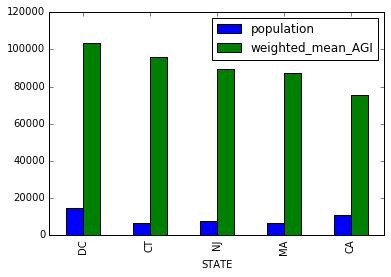

In [42]:
top_5_states.plot(kind='bar',x='STATE')

# pandas and world tourism data

In [43]:
# `cat` is an easy way to examine file contents in place

# !cat tourism_data/581a4d76-9f6d-4786-b22c-73d59627d1e2_v2.csv

In [44]:
# read in a CSV
df = pd.read_csv('tourism_data/581a4d76-9f6d-4786-b22c-73d59627d1e2_v2.csv',skiprows=4)
# df = pd.read_csv('tourism_data/581a4d76-9f6d-4786-b22c-73d59627d1e2_v2.csv')

In [45]:
# get information about type for a given field, and how many values you can expect for each
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [46]:
df_subset = df.dropna(axis=1,how='all')

In [47]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 23 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1995              204 non-null float64
1996              206 non-null float64
1997              207 non-null float64
1998              210 non-null float64
1999              210 non-null float64
2000              215 non-null float64
2001              216 non-null float64
2002              215 non-null float64
2003              220 non-null float64
2004              222 non-null float64
2005              225 non-null float64
2006              227 non-null float64
2007              230 non-null float64
2008              230 non-null float64
2009              228 non-null float64
2010              229 non-null float64
2011              225 non-null float64
2012              217 non-null float64
2013              205 non-null float64
dt

In [48]:
# df_subset.drop(['Indicator Name','Indicator Code'], axis=1, inplace=True)
df_subset = df_subset.drop(['Indicator Name','Indicator Code'], axis=1)

In [49]:
df_subset.head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,619000,641000,650000,647000,683000,721000,691000,643000,...,728000,733000,694000,772000,827000,813000,824000,869000,904000,979000
1,Andorra,AND,NaN,NaN,NaN,NaN,2347000,2949000,3516000,3387000,...,2791000,2418000,2227000,2189000,2059000,1830000,1808000,2242000,2238000,2335000
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,9000,21000,45000,52000,45000,51000,67000,91000,...,194000,210000,121000,195000,294000,366000,425000,481000,528000,650000
4,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1062000,1247000,1711000,2191000,2469000,3156000,2857000


In [50]:
df_melted = pd.melt(df_subset, id_vars=['Country Name', 'Country Code'])

In [51]:
df_melted

,Country Name,Country Code,variable,value
0,Aruba,ABW,1995,6.190000e+05
1,Andorra,AND,1995,NaN
2,Afghanistan,AFG,1995,NaN
3,Angola,AGO,1995,9.000000e+03
4,Albania,ALB,1995,NaN
5,Arab World,ARB,1995,2.566348e+07
6,United Arab Emirates,ARE,1995,2.315000e+06
7,Argentina,ARG,1995,2.289000e+06
8,Armenia,ARM,1995,1.200000e+04
9,American Samoa,ASM,1995,3.400000e+04


In [52]:
df_melted.rename(columns={'variable':'Year','value':'Tourists'},inplace=True)

In [53]:
df_melted[df_melted['Country Code']== 'DOM']

,Country Name,Country Code,Year,Tourists
56,Dominican Republic,DOM,1995,1776000
304,Dominican Republic,DOM,1996,1926000
552,Dominican Republic,DOM,1997,2211000
800,Dominican Republic,DOM,1998,2309000
1048,Dominican Republic,DOM,1999,2649000
1296,Dominican Republic,DOM,2000,2978000
1544,Dominican Republic,DOM,2001,2882000
1792,Dominican Republic,DOM,2002,2811000
2040,Dominican Republic,DOM,2003,3282000
2288,Dominican Republic,DOM,2004,3450000


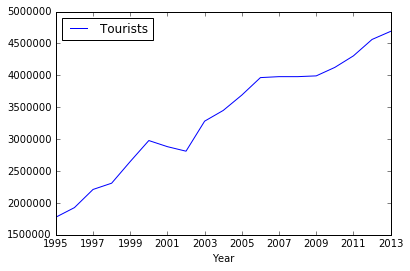

In [54]:
df_melted[df_melted['Country Code']== 'DOM'].plot(x='Year')